In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [77]:
class PerceptronGraph:

    def __init__(self, learning_rate_w, learning_rate_b, activation_method='sigmoid'):
        # self.w = np.random.rand()
        self.b = np.random.rand()
        self.lrw = learning_rate_w
        self.lrb = learning_rate_b
        self.method = activation_method
        self.fig = plt.figure(figsize=(6,11))
        self.ax1 = self.fig.add_subplot(2,1,1)
        self.ax2 = self.fig.add_subplot(2,1,2)
        
    def activation_func(self, x):
        if self.method == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        if self.method == 'relu':
            return max([0, x])
        if self.method == 'tanh':
            return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        if self.method == 'linear':
            return x
        if self.method == 'softsign':
            return x / (abs(x) + 1)
            
    def fit_and_eval(self, x_train, y_train, x_test, y_test, epochs):
        if x_train.ndim == 1:
            x_train = x_train.reshape((-1,1))
        self.w = np.random.rand(x_train.shape[1])
        accs_train = []
        accs_test = []
        losses_train = []
        losses_test = []
        for ep in range(epochs):
            for i in range(len(x_train)):
                error = y_train[i] - self.activation_func(x_train[i] @ self.w + self.b)
                self.w += x_train[i] * error * self.lrw
                self.b += error * self.lrb
            accs_train.append(self.calc_accuracy(x_train, y_train))
            accs_test.append(self.calc_accuracy(x_test, y_test))
            losses_train.append(self.calc_loss(x_train, y_train))
            losses_test.append(self.calc_loss(x_test, y_test))
            
        self.ax1.plot(accs_train, label='train')
        self.ax1.plot(accs_test, label='test')
        self.ax1.set_title('model accuracy')
        self.ax1.set_xlabel('epoch')
        self.ax1.set_ylabel('accuracy')
        self.ax1.legend()

        self.ax2.plot(losses_train, label='train')
        self.ax2.plot(losses_test, label='test')
        self.ax2.set_title('model loss')
        self.ax2.set_xlabel('epoch')
        self.ax2.set_ylabel('loss')
        self.ax2.legend()

    def calc_accuracy(self, x_test, y_test):
        y_pred = self.predict(x_test)
        y_pred = y_pred > .5
        return np.mean(y_pred == y_test)

    def calc_loss(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return np.mean((y_pred - y_test) **2)

    def predict(self, x_test):
        y_pred = np.zeros(x_test.shape[0])
        if len(self.w) == 1:
            y_pred = x_test * self.w
        else:
            for i in range(len(self.w)):
                y_pred += x_test[:,i] * self.w[i]
        y_pred += self.b

        return np.array([self.activation_func(y) for y in y_pred])

In [27]:
data = pd.read_csv('datasets/Surgical-deepnet.csv')
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [28]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [52]:
x = data.drop('complication', axis=1).to_numpy()
y = data['complication'].copy().to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y)

### sigmoid

array([[2436,  280],
       [ 534,  409]], dtype=int64)

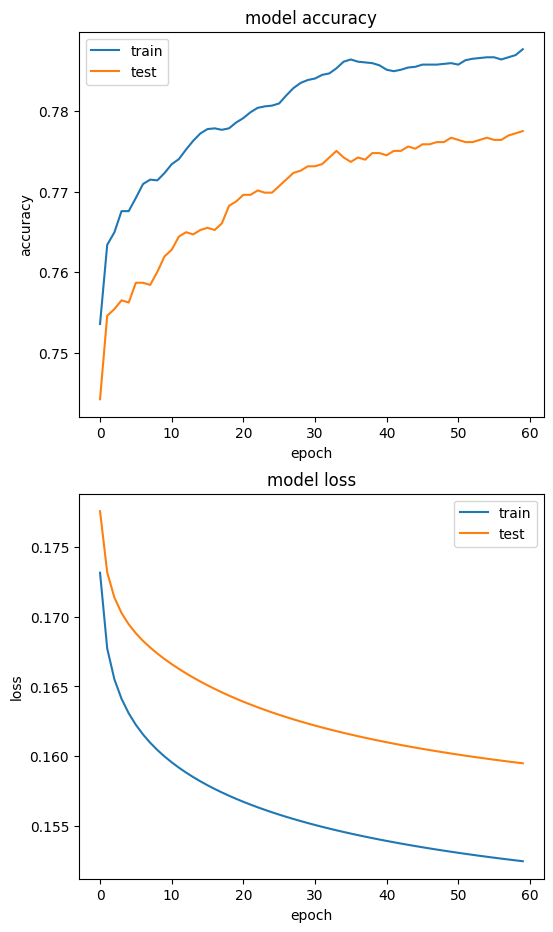

In [76]:
model = PerceptronGraph(0.001, 0.001, 'sigmoid')
model.fit_and_eval(x_train, y_train, x_test, y_test, epochs=60)

y_pred = model.predict(x_test)
y_pred = y_pred > .5
confusion_matrix(y_test, y_pred)

### relu

array([[2306,  410],
       [ 441,  502]], dtype=int64)

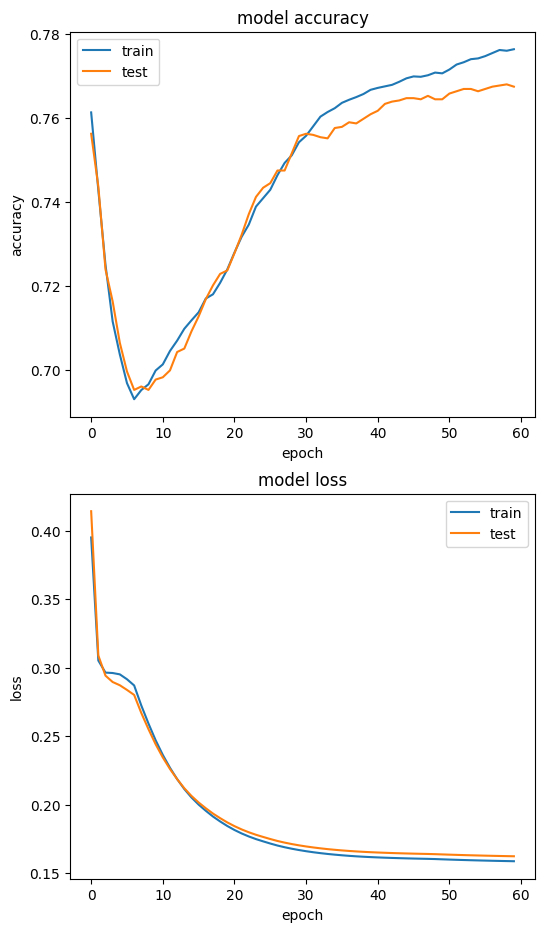

In [69]:
model = PerceptronGraph(0.0001, 0.0001, 'relu')
model.fit_and_eval(x_train, y_train, x_test, y_test, epochs=60)

y_pred = model.predict(x_test)
y_pred = y_pred > .5
confusion_matrix(y_test, y_pred)

### tanh

array([[2571,  145],
       [ 642,  301]], dtype=int64)

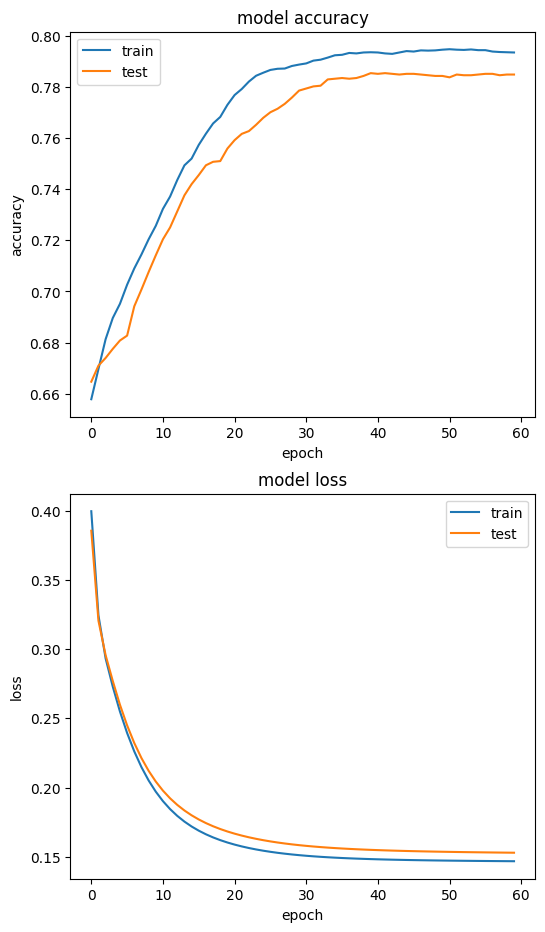

In [68]:
model = PerceptronGraph(0.0001, 0.0001, 'tanh')
model.fit_and_eval(x_train, y_train, x_test, y_test, epochs=60)

y_pred = model.predict(x_test)
y_pred = y_pred > .5
confusion_matrix(y_test, y_pred)

### linear

array([[2647,   69],
       [ 760,  183]], dtype=int64)

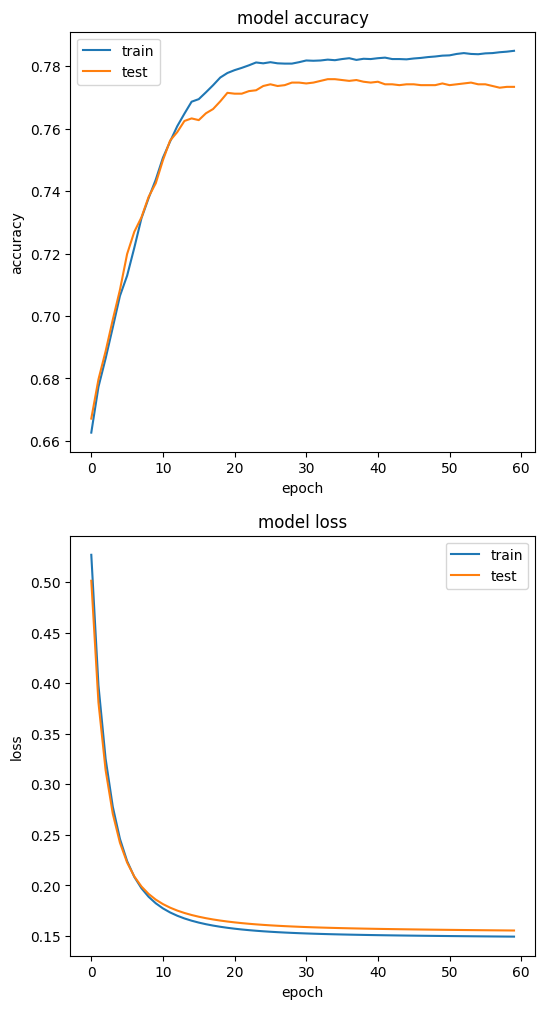

In [60]:
model = PerceptronGraph(0.0001, 0.0001, 'linear')
model.fit_and_eval(x_train, y_train, x_test, y_test, epochs=60)

y_pred = model.predict(x_test)
y_pred = y_pred > .5
confusion_matrix(y_test, y_pred)

### softsign

array([[2617,   99],
       [ 713,  230]], dtype=int64)

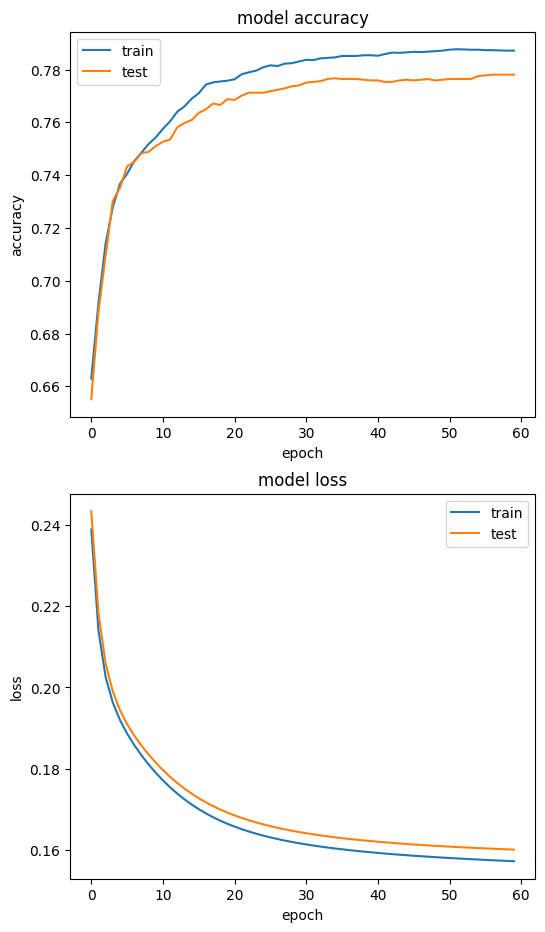

In [79]:
model = PerceptronGraph(0.0001, 0.0001, 'softsign')
model.fit_and_eval(x_train, y_train, x_test, y_test, epochs=60)

y_pred = model.predict(x_test)
y_pred = y_pred > .5
confusion_matrix(y_test, y_pred)